In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.custom_datasets import DelightClassic

In [2]:
df = pd.read_csv("..\data\SERSIC\df_coords_fix.csv", dtype={'objID': 'Int64'})
images_multi = np.load("..\data\SERSIC\dataset_multires_30.npy")

sn_pos = df[["dx","dy"]].values.astype(np.float32)

In [3]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

In [4]:
dataset_delight_h2f =  DelightClassic(
                                imgs = torch.tensor(images_multi),
                                sn_pos = torch.tensor(sn_pos))

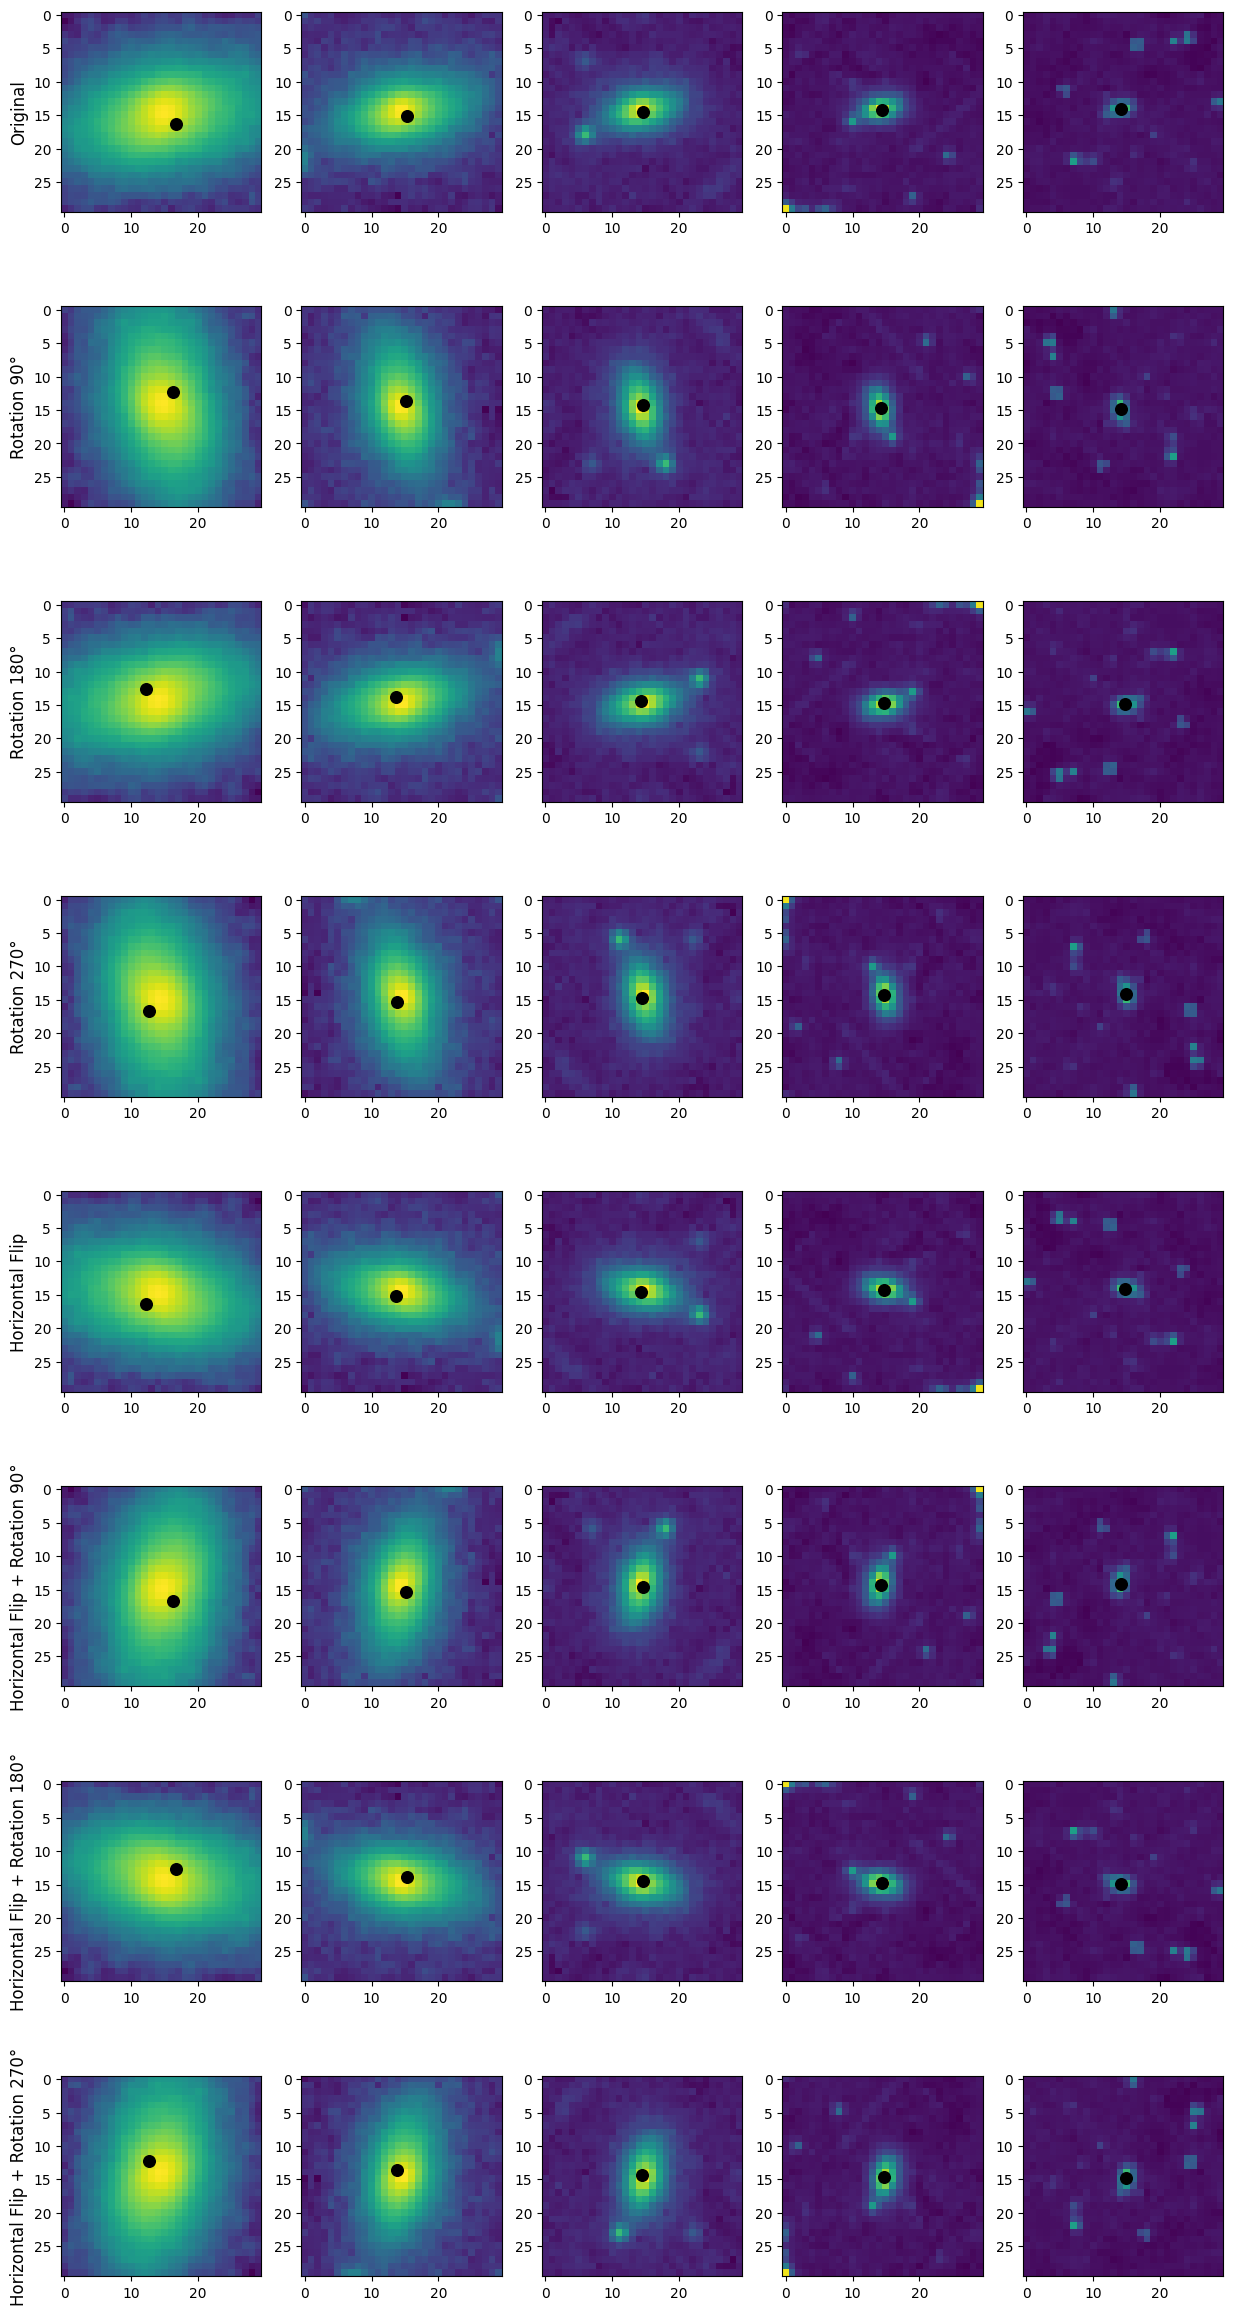

In [5]:
idx = 0

example = dataset_delight_h2f[idx]
centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])

pos = 0
fig, axs = plt.subplots(8,5, figsize=(15,30))

for i, (pos, trans_name) in enumerate(transformations.items()):

    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) + centros[i][0]) , (example[1][pos][1]/(2**m)+ centros[i][1]), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()